In [173]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [174]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [175]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [179]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [180]:
trainData['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [181]:
trainData['Age'] = trainData['Age'].fillna(trainData['Age'].median())
trainData['Embarked'] = trainData['Embarked'].fillna(trainData['Embarked'].mode()[0])
trainData['Fare'] = trainData['Fare'].fillna(trainData['Fare'].median())
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [182]:
testData['Age'] = testData['Age'].fillna(testData['Age'].median())
testData['Embarked'] = testData['Embarked'].fillna(testData['Embarked'].mode()[0])
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].median())
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [183]:
trainData = pd.get_dummies(trainData, columns=['Sex', 'Embarked'])
testData = pd.get_dummies(testData, columns=['Sex', 'Embarked'])
trainData.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [184]:
trainData.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
testData.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

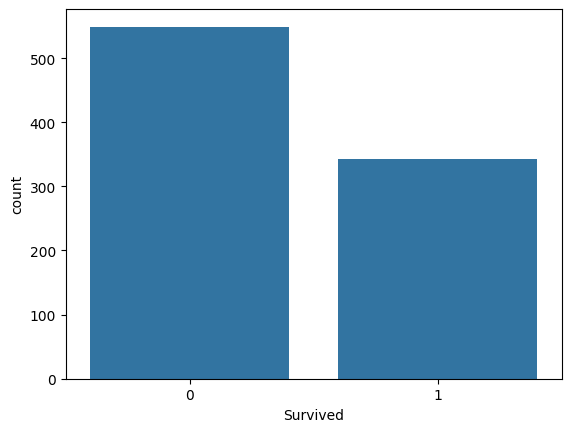

In [185]:
sns.countplot(x='Survived',data=trainData)

<Axes: xlabel='Age', ylabel='Count'>

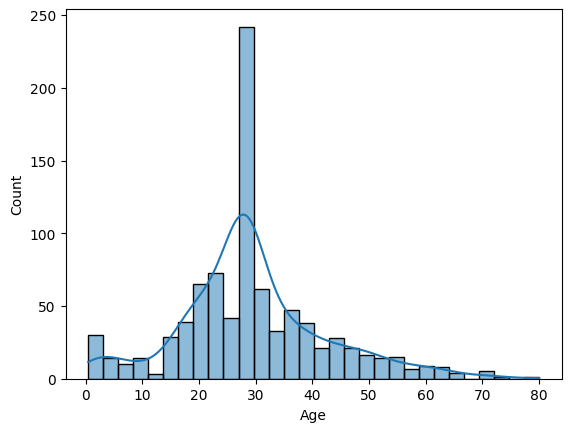

In [186]:
sns.histplot(trainData['Age'], bins=30, kde= True)

<Axes: xlabel='Sex_male', ylabel='Survived'>

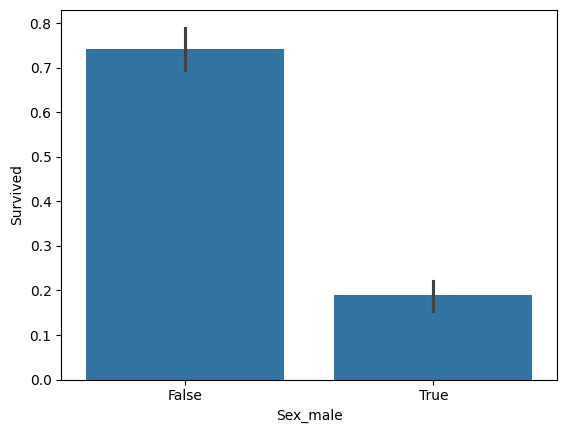

In [187]:
sns.barplot(data=trainData,x='Sex_male',y='Survived')

In [188]:
X= trainData.drop('Survived',axis=1)
y = trainData['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

In [189]:
accuracy = accuracy_score(y_val,y_pred)
print('Accuracy : ',accuracy)

Accuracy :  0.776536312849162


In [190]:
conf_matrix = confusion_matrix(y_val,y_pred)
print('confusion_matrix : ', conf_matrix)

confusion_matrix :  [[83 22]
 [18 56]]


In [191]:
class_report = classification_report(y_val,y_pred)
print('classification_report : ')
print(class_report)

classification_report : 
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



[Text(0.5371275267193308, 0.9772727272727273, 'Sex_female <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Not Survived'),
 Text(0.23038888243494424, 0.9318181818181818, 'Age <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Not Survived'),
 Text(0.38375820457713755, 0.9545454545454546, 'True  '),
 Text(0.07713754646840149, 0.8863636363636364, 'SibSp <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7.0, 15.0]\nclass = Survived'),
 Text(0.06970260223048327, 0.8409090909090909, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Survived'),
 Text(0.0845724907063197, 0.8409090909090909, 'Age <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Not Survived'),
 Text(0.07713754646840149, 0.7954545454545454, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Not Survived'),
 Text(0.09200743494423792, 0.7954545454545454, 'Age <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Not Survived'),
 Text(0.0845724907063197, 0.75, 'gini = 0.0\nsamples = 1\nvalue

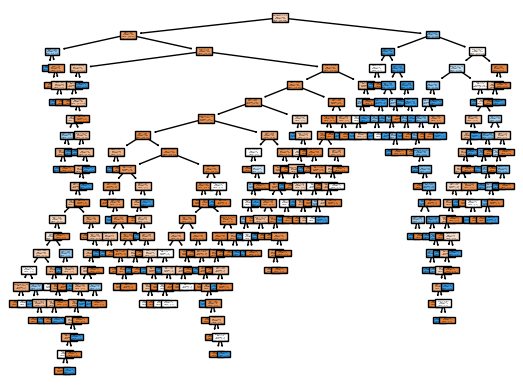

In [192]:
plot_tree(clf, filled=True, feature_names=x.columns, class_names=['Not Survived','Survived'])